# MNIST Fashion Dataset
### Predicting the type of clothing using various TensorFlow models


In [9]:
# Set up notebook headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from metrics import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import History
from tensorflow.keras.datasets import fashion_mnist

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Data Collection
Fashion MNIST is a dataset within TensorFlow that contains 70,000 grayscale images of clothing items categorized into 10 classes, such as T-shirts, dresses, and shoes. Each image is 28x28 pixels, making it a popular benchmark for training and testing machine learning models for image classification tasks.

#### Loading Raw Data
Read in Fashion MNIST dataset directly via TensorFlow.

In [10]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Display the shape of the datasets
print("Fashion MNIST Dataset Dimensions")
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

Fashion MNIST Dataset Dimensions
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


#### Visualise Raw Data
Have a peek at some images to see how they are presented.

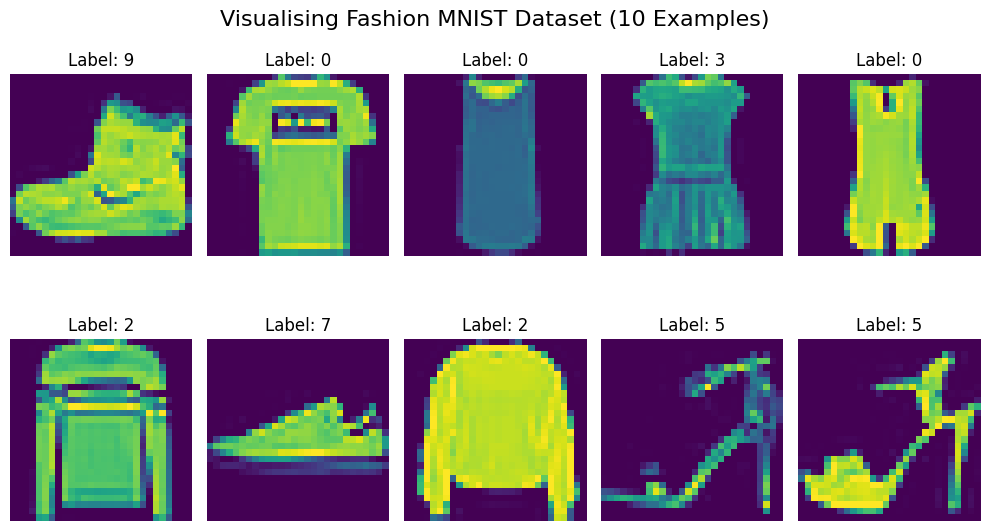

In [11]:
# Visualise the first 10 images in the training set
plt.figure(figsize = (10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)  
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  
plt.tight_layout()
plt.suptitle("Visualising Fashion MNIST Dataset (10 Examples)", fontsize = 16)
plt.show()

The labels are provided as integers, so we will need to map them to the corresponding clothing categories for the final predictions.

In [12]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Preprocess Data
Let's reshape the data and ensure pixel values in the images are normalised so the models can interpret them correctly. Whilst the labels don't necessarily need to be one-hot encoded, let's do so anyway for completeness. Finally, we'll need to split the entire dataset of 70,000 images into training, validation, and test sets using a 75/15/10 split, respectively.

In [13]:
# Combine the current train and test sets to create one dataset
images = np.concatenate([train_images, test_images], axis = 0)
labels = np.concatenate([train_labels, test_labels], axis = 0)

# Preprocess the data
num_classes = np.max(labels) + 1
images_mod = images.reshape((-1, images.shape[1], images.shape[1], 1)).astype('float32') / 255.0

In [14]:
# Split into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(images_mod, labels, test_size = 0.25)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.4)

In [15]:
# Print shape of datasets
print("Fashion MNIST Modified Dataset Dimensions")
print("Shape of training images:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of validation images:", x_val.shape)
print("Shape of validation labels:", y_val.shape)
print("Shape of test images:", x_test.shape)
print("Shape of test labels:", y_test.shape)

Fashion MNIST Modified Dataset Dimensions
Shape of training images: (52500, 28, 28, 1)
Shape of training labels: (52500,)
Shape of validation images: (10500, 28, 28, 1)
Shape of validation labels: (10500,)
Shape of test images: (7000, 28, 28, 1)
Shape of test labels: (7000,)


#### Model Creation
We will be building various TensorFlow models and testing their performance on the test set to decide what the optimal configuration should be. During the training process, note that all models will incorporate:
- 10 epochs

- Batch size of 32

- ReLU activation function for hidden layers

- Softmax activation function for output layer

- Adam optimiser

- Sparse Categorical Cross-Entropy loss

##### **Model 1: Simple Neural Network (Baseline)**

Build a simple neural network with 2 fully-connected hidden layers.

In [16]:
# Set up model by adding layers sequentially
base = models.Sequential()
base.add(layers.Flatten(input_shape = (x_train.shape[1], x_train.shape[1], 1)))

# Add hidden layers
base.add(layers.Dense(units = 256, activation = 'relu'))
base.add(layers.Dense(units = 128, activation = 'relu'))

# Add output layer
base.add(layers.Dense(units = num_classes, activation = 'softmax'))

# Compile model
base.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Define a History callback to record training metrics
base_history = History()

# Fit model on training data
base.fit(x_train, y_train, batch_size = 32, epochs = 10, callbacks = [base_history],  validation_data = (x_val, y_val))

# Print model summary
base.summary()

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7769 - loss: 0.6312 - val_accuracy: 0.8547 - val_loss: 0.3941
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8578 - loss: 0.3843 - val_accuracy: 0.8768 - val_loss: 0.3407
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8776 - loss: 0.3323 - val_accuracy: 0.8722 - val_loss: 0.3436
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8851 - loss: 0.3137 - val_accuracy: 0.8839 - val_loss: 0.3279
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8906 - loss: 0.2946 - val_accuracy: 0.8797 - val_loss: 0.3302
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8971 - loss: 0.2764 - val_accuracy: 0.8944 - val_loss: 0.3023
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9010 - loss: 0.2634 - val_accuracy: 0.8947 - val_loss: 0.2935
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9076 - loss: 0.2436 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,440 (2.69 MB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470,294 (1.79 MB)

Let's look at the training progress over all epochs.

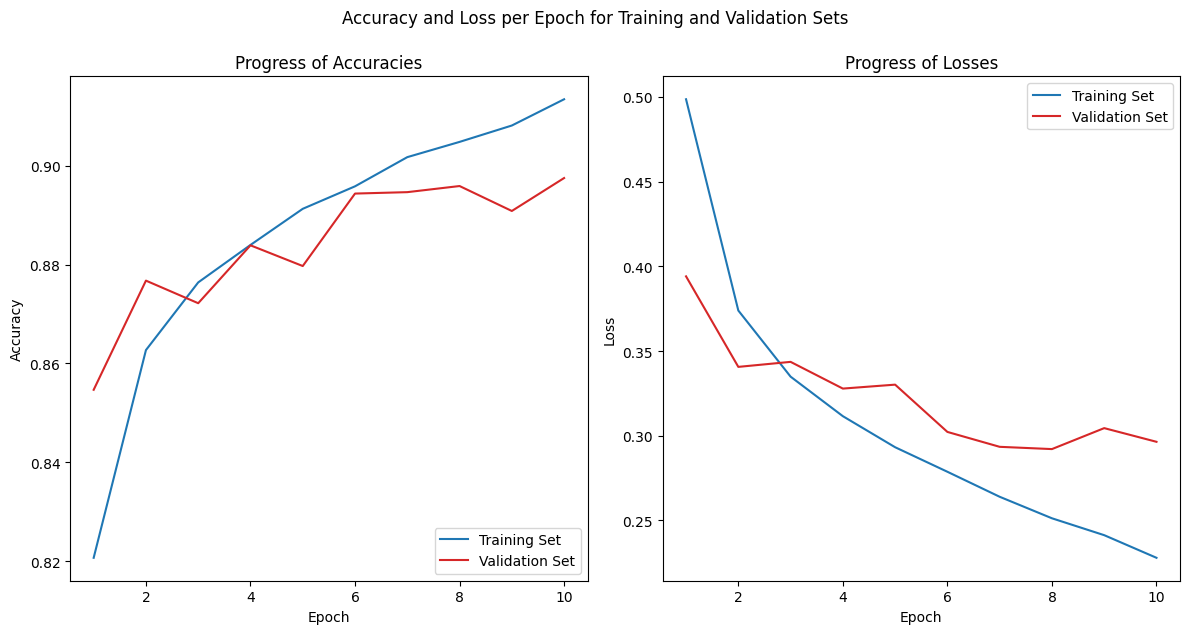

In [17]:
# Plot training progress for training and validation data
epochs = np.arange(1, 11)
training_progress(epochs, base_history.history['accuracy'], base_history.history['loss'], base_history.history['val_accuracy'], base_history.history['val_loss'])

**Comments**: Training accuracy and loss improves steadily with the most significant movements made during the first 4 epochs. These gradually get closer to convergence by the end of training. Validation accuracy and loss improve overall, but show fluctuations throughout, suggesting potential overfitting to the training set. This is confirmed by the divergence of the two lines in each plot.

View performance metrics after predicting on the test set.

In [18]:
# Predict on test set
base_preds = base.predict(x_test)

# Extract confidence scores for predicted labels
confidence_scores = np.max(base_preds, axis = 1)

# Extract predicted labels
y_pred = np.argmax(base_preds, axis = 1)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


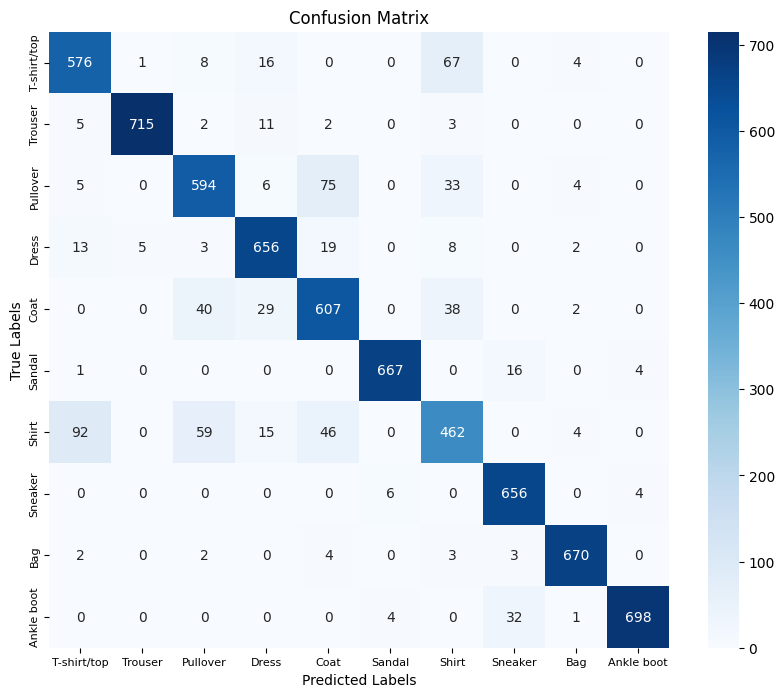

In [19]:
# Plot confusion matrix
confusion_matrix_ad(y_test, y_pred, num_classes, classes)

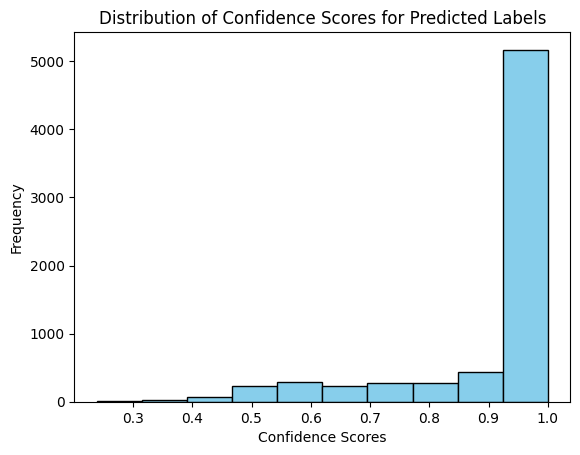

In [20]:
# Plot distribution of confidence scores
confidence_distribution(confidence_scores)

In [21]:
# Display classification report
classification_report_ad(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8300    0.8571    0.8433       672
           1     0.9917    0.9688    0.9801       738
           2     0.8390    0.8285    0.8337       717
           3     0.8950    0.9292    0.9117       706
           4     0.8061    0.8478    0.8264       716
           5     0.9852    0.9695    0.9773       688
           6     0.7524    0.6814    0.7152       678
           7     0.9279    0.9850    0.9556       666
           8     0.9753    0.9795    0.9774       684
           9     0.9887    0.9497    0.9688       735

    accuracy                         0.9001      7000
   macro avg     0.8991    0.8996    0.8989      7000
weighted avg     0.9000    0.9001    0.8996      7000



**Summary**: The model exhibited robust performance with an overall high accuracy and F1 macro score of around 90%, demonstrating strong capability across all classes. This was further supported by the confusion matrix, which showed prominent diagonal values, indicating robust predictions overall. Shirts were predicted least accurately often mistaken with upper body garments such as pullovers, coats, and t-shirts/tops, likely due to their similar shapes posing difficulties in differentiation. The model generally assigned high confidence scores to its predictions, with a majority exceeding 80%, underscoring its reliability in decision-making.

##### **Model 2: Deep Neural Network (DNN) - No Regularisation**

Build a deep neural network with 3 fully-connected hidden layers.

In [22]:
# Set up model by adding layers sequentially
dnn = models.Sequential()
dnn.add(layers.Flatten(input_shape = (x_train.shape[1], x_train.shape[1], 1)))

# Add hidden layers
dnn.add(layers.Dense(256, activation = 'relu'))
dnn.add(layers.Dense(128, activation = 'relu'))
dnn.add(layers.Dense(64, activation = 'relu'))

# Add output layer
dnn.add(layers.Dense(num_classes, activation = 'softmax'))

# Compile the model
dnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Define a History callback to record training metrics
dnn_history = History()

# Fit model on training data
dnn.fit(x_train, y_train, batch_size = 32, epochs = 10, callbacks = [dnn_history],  validation_data = (x_val, y_val))

# Print model summary
dnn.summary()

Epoch 1/10


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7680 - loss: 0.6500 - val_accuracy: 0.8265 - val_loss: 0.4634
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8599 - loss: 0.3781 - val_accuracy: 0.8577 - val_loss: 0.3768
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8719 - loss: 0.3470 - val_accuracy: 0.8792 - val_loss: 0.3324
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8762 - loss: 0.3252 - val_accuracy: 0.8720 - val_loss: 0.3418
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8910 - loss: 0.2914 - val_accuracy: 0.8812 - val_loss: 0.3224
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8931 - loss: 0.2855 - val_accuracy: 0.8802 - val_loss: 0.3210
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8997 - loss: 0.2681 - val_accuracy: 0.8788 - val_loss: 0.3254
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9010 - loss: 0.2592 - val_accura

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

Let's look at the training progress over all epochs.

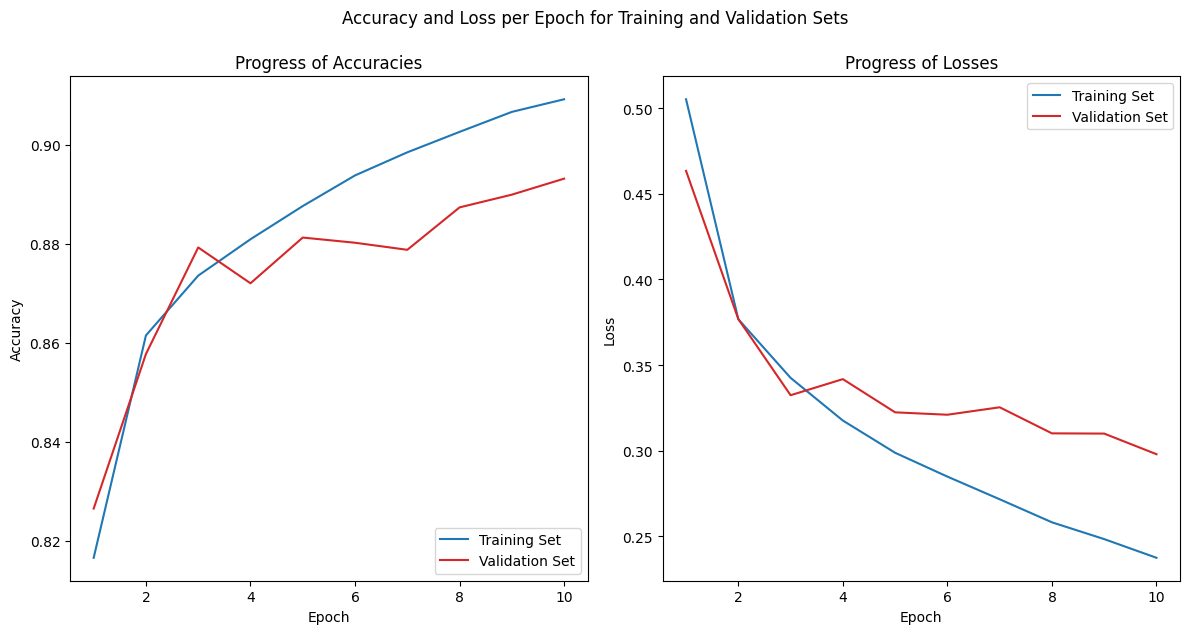

In [23]:
# Plot training progress for training and validation data
training_progress(epochs, dnn_history.history['accuracy'], dnn_history.history['loss'], dnn_history.history['val_accuracy'], dnn_history.history['val_loss'])

**Comments**: The training process showed consistent improvements, achieving a high training accuracy of 91% and a loss of 0.24 by the final epoch. Similarly, validation accuracy and loss generally improved over time, though fluctuations emerged from the 3rd epoch onward, suggesting potential overfitting to the training data with diverging trends in both accuracy and loss plots.

View performance metrics after predicting on the test set.

In [24]:
# Predict on test set
dnn_preds = dnn.predict(x_test)

# Extract confidence scores for predicted labels
confidence_scores = np.max(dnn_preds, axis = 1)

# Extract predicted labels
y_pred = np.argmax(dnn_preds, axis = 1)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


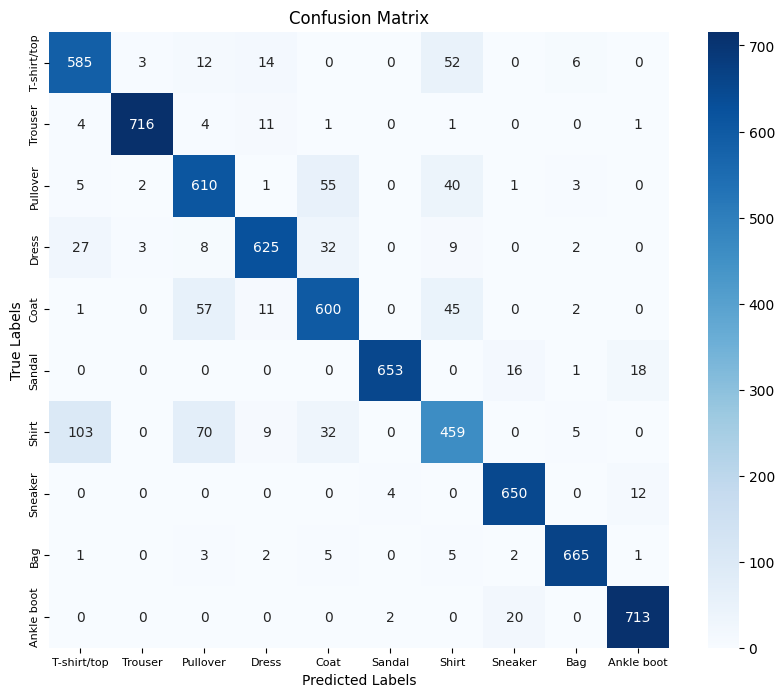

In [25]:
# Plot confusion matrix
confusion_matrix_ad(y_test, y_pred, num_classes, classes)

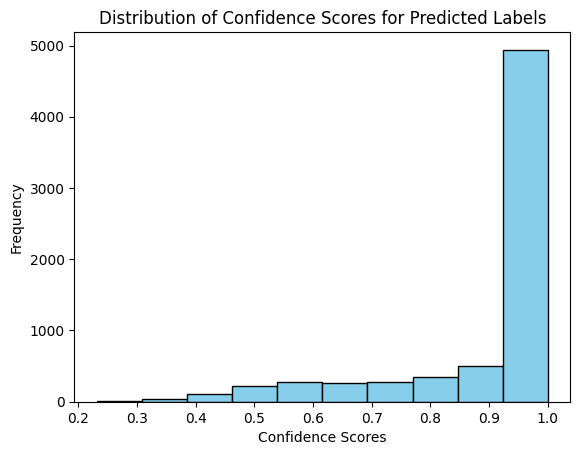

In [26]:
# Plot distribution of confidence scores
confidence_distribution(confidence_scores)

In [27]:
# Display classification report
classification_report_ad(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8058    0.8705    0.8369       672
           1     0.9890    0.9702    0.9795       738
           2     0.7984    0.8508    0.8238       717
           3     0.9287    0.8853    0.9065       706
           4     0.8276    0.8380    0.8328       716
           5     0.9909    0.9491    0.9696       688
           6     0.7512    0.6770    0.7122       678
           7     0.9434    0.9760    0.9594       666
           8     0.9722    0.9722    0.9722       684
           9     0.9570    0.9701    0.9635       735

    accuracy                         0.8966      7000
   macro avg     0.8964    0.8959    0.8956      7000
weighted avg     0.8971    0.8966    0.8963      7000



**Summary**: The model achieved an overall accuracy and F1 macro score of 90%, demonstrating effective prediction capabilities across all classes. Similar to Model 1, the confusion matrix highlights frequent misclassifications of shirts as other upper body garments such as t-shirts/tops, coats, and pullovers, as reflected in the F1 score. Despite high confidence scores (mostly exceeding 80%), low precision for pullovers and shirts indicates a notable proportion of incorrect predictions for these classes. Additionally, low recall for shirts suggests that many actual instances were missed in predictions. The inclusion of an additional hidden layer compared to the baseline did not yield significant improvements in performance.

##### **Model 3: Deep Neural Network (DNN) - With Regularisation**

Build a deep neural network with 3 fully-connected hidden layers and L2-Regularisation.

In [28]:
# Set up model by adding layers sequentially
dnn_reg = models.Sequential()
dnn_reg.add(layers.Flatten(input_shape = (x_train.shape[1], x_train.shape[1], 1)))

# Add hidden layers with L2 regularization
dnn_reg.add(layers.Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
dnn_reg.add(layers.Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
dnn_reg.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))

# Add output layer
dnn_reg.add(layers.Dense(num_classes, activation = 'softmax'))

# Compile the model
dnn_reg.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Define a History callback to record training metrics
dnn_reg_history = History()

# Fit model on training data
dnn_reg.fit(x_train, y_train, batch_size = 32, epochs = 10, callbacks = [dnn_reg_history],  validation_data = (x_val, y_val))

# Print model summary
dnn_reg.summary()

Epoch 1/10


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7303 - loss: 2.1101 - val_accuracy: 0.7890 - val_loss: 0.8453
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7928 - loss: 0.8249 - val_accuracy: 0.8116 - val_loss: 0.7424
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8064 - loss: 0.7517 - val_accuracy: 0.8041 - val_loss: 0.7404
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8164 - loss: 0.7055 - val_accuracy: 0.8141 - val_loss: 0.6972
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8172 - loss: 0.6828 - val_accuracy: 0.8190 - val_loss: 0.6618
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8273 - loss: 0.6559 - val_accuracy: 0.8322 - val_loss: 0.6263
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8275 - loss: 0.6443 - val_accuracy: 0.8375 - val_loss: 0.5994
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8297 - loss: 0.6312 - val_accur

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

Let's look at the training progress over all epochs.

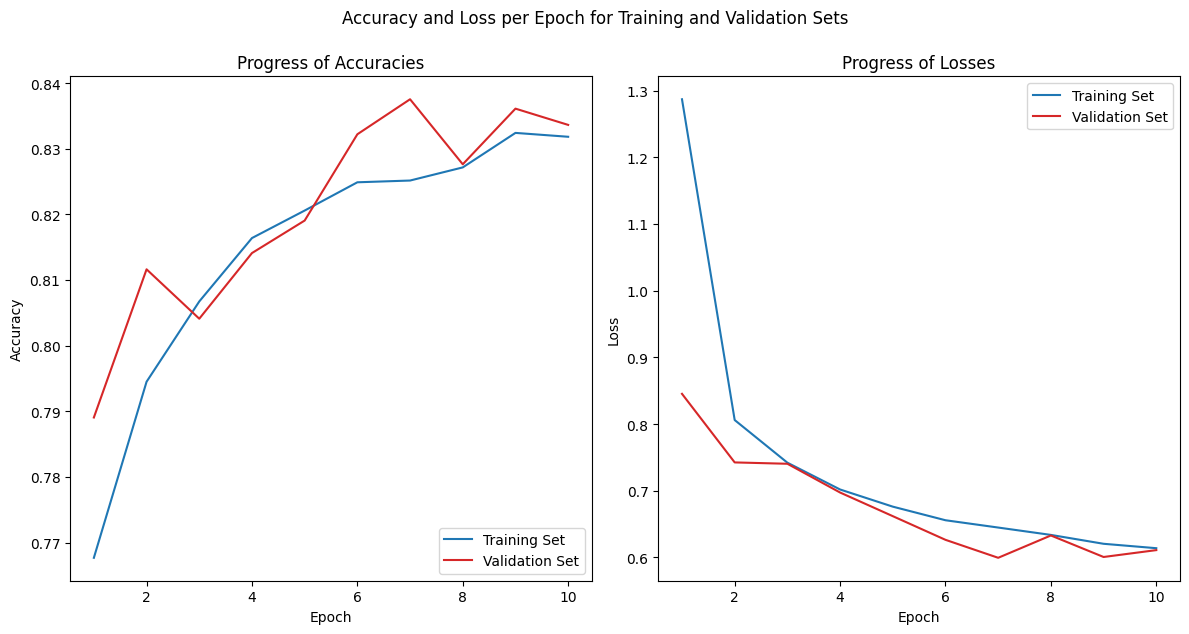

In [29]:
# Plot training progress for training and validation data
training_progress(epochs, dnn_reg_history.history['accuracy'], dnn_reg_history.history['loss'], dnn_reg_history.history['val_accuracy'], dnn_reg_history.history['val_loss'])

**Comments**: By epoch 9, training stabilized with the model reaching 83% accuracy and a loss of 0.61. Conversely, validation metrics fluctuated throughout all epochs, showcasing varied accuracy and loss. Overall, validation metrics showed steady improvement, with accuracy and loss slightly surpassing those of the training set by epoch 10. Regularisation effectively mitigated overfitting by applying penalties across all hidden layers. However, the model's overall performance did not exceed that of Model 2 (without regularisation).

View performance metrics after predicting on the test set.

In [30]:
# Predict on test set
dnn_reg_preds = dnn_reg.predict(x_test)

# Extract confidence scores for predicted labels
confidence_scores = np.max(dnn_reg_preds, axis = 1)

# Extract predicted labels
y_pred = np.argmax(dnn_reg_preds, axis = 1)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


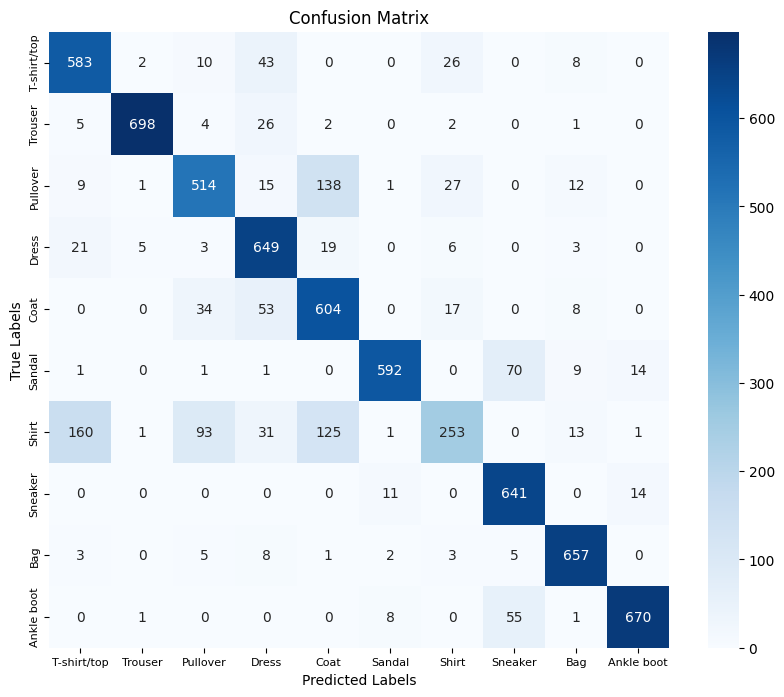

In [31]:
# Plot confusion matrix
confusion_matrix_ad(y_test, y_pred, num_classes, classes)

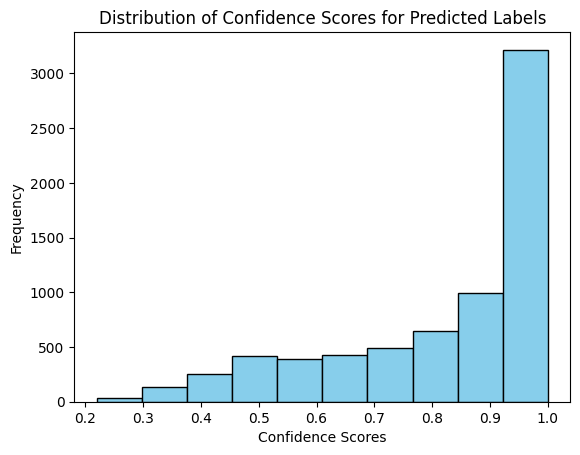

In [32]:
# Plot distribution of confidence scores
confidence_distribution(confidence_scores)

In [33]:
# Display classification report
classification_report_ad(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.7455    0.8676    0.8019       672
           1     0.9859    0.9458    0.9654       738
           2     0.7741    0.7169    0.7444       717
           3     0.7857    0.9193    0.8473       706
           4     0.6794    0.8436    0.7526       716
           5     0.9626    0.8605    0.9087       688
           6     0.7575    0.3732    0.5000       678
           7     0.8314    0.9625    0.8921       666
           8     0.9228    0.9605    0.9413       684
           9     0.9585    0.9116    0.9344       735

    accuracy                         0.8373      7000
   macro avg     0.8403    0.8361    0.8288      7000
weighted avg     0.8414    0.8373    0.8302      7000



**Summary**: The model exhibited generally high confidence scores, though they varied more widely, spanning from 40% to 90% across predictions, unlike previous models. The confusion matrix highlighted persistent challenges in predicting shirts, performing notably worse than in Model 2. Specifically, coats showed the lowest precision values, indicating numerous incorrect predictions, while pullovers and shirts had lower recall values, suggesting instances were missed during prediction, especially for shirts (0.37). Despite regularisation efforts, the model achieved an overall accuracy and F1 macro average of 84% and 83%, respectively, significantly underperforming compared to the non-regularised approach.

##### **Model 4: Convolutional Neural Network (CNN)**

Build a convolutional neural network with 3 convolutional layers (with the first 2 each accompanied by a pooling layer) and a dropout of 0.2 for the last 2 convolutional layers.

In [34]:
# Set up model by adding layers sequentially
cnn = models.Sequential()

# Add convolutional layers for localised feature extraction
cnn.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (x_train.shape[1], x_train.shape[1], 1)))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Dropout(0.2))

cnn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.2))

# Add output layer
cnn.add(layers.Dense(num_classes, activation = 'softmax'))

# Compile model
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Define a History callback to record training metrics
cnn_history = History()

# Fit model on training data
cnn.fit(x_train, y_train, batch_size = 32, epochs = 10, callbacks = [cnn_history],  validation_data = (x_val, y_val))

# Print model summary
cnn.summary()

Epoch 1/10


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7133 - loss: 0.7913 - val_accuracy: 0.8533 - val_loss: 0.3917
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8609 - loss: 0.3857 - val_accuracy: 0.8872 - val_loss: 0.3128
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8790 - loss: 0.3363 - val_accuracy: 0.8911 - val_loss: 0.2985
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8923 - loss: 0.2966 - val_accuracy: 0.8993 - val_loss: 0.2807
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8963 - loss: 0.2801 - val_accuracy: 0.9019 - val_loss: 0.2709
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9038 - loss: 0.2633 - val_accuracy: 0.9102 - val_loss: 0.2532
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9079 - loss: 0.2515 - val_accuracy: 0.9134 - val_loss: 0.2450
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9113 - loss: 0.23

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,544 (720.88 KB)

 Trainable params: 61,514 (240.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,030 (480.59 KB)

Let's look at the training progress over all epochs.

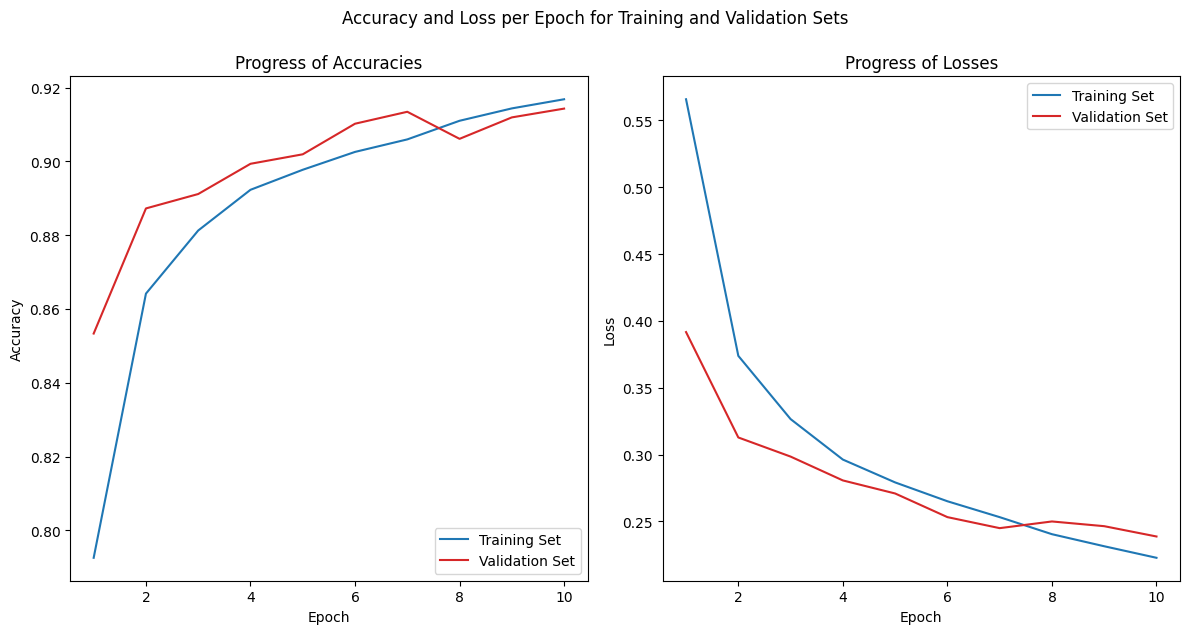

In [35]:
# Plot training progress for training and validation data
training_progress(epochs, cnn_history.history['accuracy'], cnn_history.history['loss'], cnn_history.history['val_accuracy'], cnn_history.history['val_loss'])

**Comments:** Training progress demonstrated remarkable improvement in accuracy and loss across both training and validation sets, closely mirroring each other. By the final epoch, both accuracy metrics were near 91-92%, marking the highest achieved thus far. The model exhibited no signs of overfitting, demonstrating strong generalisation across various datasets.

View performance metrics after predicting on test set.

In [36]:
# Predict on test set
cnn_preds = cnn.predict(x_test)

# Extract confidence scores for predicted labels
confidence_scores = np.max(cnn_preds, axis = 1)

# Extract predicted labels
y_pred = np.argmax(cnn_preds, axis = 1)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


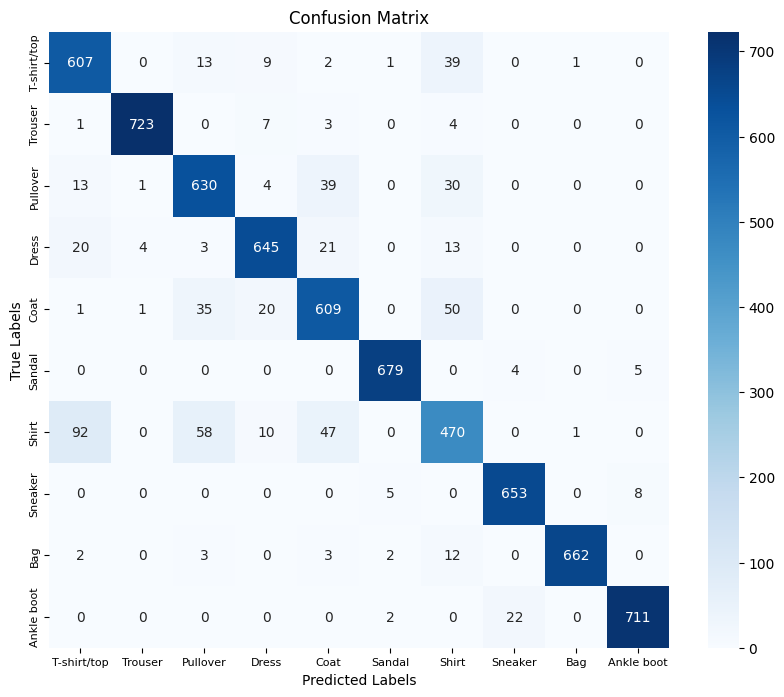

In [37]:
# Plot confusion matrix
confusion_matrix_ad(y_test, y_pred, num_classes, classes)

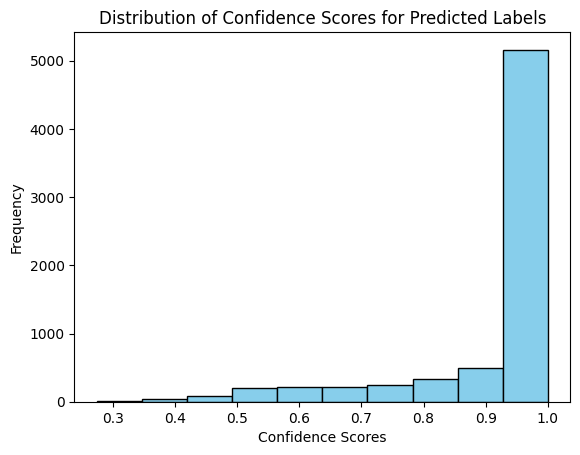

In [38]:
# Plot distribution of confidence scores
confidence_distribution(confidence_scores)

In [39]:
# Display classification report
classification_report_ad(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8247    0.9033    0.8622       672
           1     0.9918    0.9797    0.9857       738
           2     0.8491    0.8787    0.8636       717
           3     0.9281    0.9136    0.9208       706
           4     0.8412    0.8506    0.8458       716
           5     0.9855    0.9869    0.9862       688
           6     0.7605    0.6932    0.7253       678
           7     0.9617    0.9805    0.9710       666
           8     0.9970    0.9678    0.9822       684
           9     0.9820    0.9673    0.9746       735

    accuracy                         0.9127      7000
   macro avg     0.9122    0.9122    0.9117      7000
weighted avg     0.9129    0.9127    0.9124      7000



**Summary**: The confusion matrix revealed consistently high accuracy across most classes, although shirts continued to be the most challenging to predict accurately. Confidence scores remained predominantly above 80%. The model excelled with an accuracy and F1 macro score of 91%, establishing it as the top-performing model. Precision, recall, and F1-score for shirts were notably lower at 0.42, contrasting with very favorable values for other classes. The convolutional layers effectively captured spatial dependencies and patterns in the training dataset, underscoring their widespread utility in computer vision applications.

##### **Model 5: Recurrent Neural Network (RNN)**

Build a recurrent neural network with 2 LSTM layers and L2-Regularisation.

In [40]:
# Set up model by adding layers sequentially
rnn = models.Sequential()
rnn.add(layers.Reshape((x_train.shape[1], x_train.shape[1]), input_shape = (x_train.shape[1], x_train.shape[1], 1)))

# Add LSTM layers with L2 regularization
rnn.add(layers.LSTM(256, return_sequences = True, kernel_regularizer = regularizers.l2(0.01)))
rnn.add(layers.LSTM(128, kernel_regularizer = regularizers.l2(0.01)))

# Add output layer
rnn.add(layers.Dense(num_classes, activation = 'softmax'))

# Compile the model
rnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Define a History callback to record training metrics
rnn_history = History()

# Fit model on training data
rnn.fit(x_train, y_train, batch_size = 32, epochs = 10, callbacks = [rnn_history],  validation_data = (x_val, y_val))

# Print model summary
rnn.summary()

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 121s 72ms/step - accuracy: 0.6816 - loss: 1.3414 - val_accuracy: 0.8079 - val_loss: 0.6109
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 102s 62ms/step - accuracy: 0.8035 - loss: 0.6078 - val_accuracy: 0.8104 - val_loss: 0.5719
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 111s 68ms/step - accuracy: 0.8180 - loss: 0.5539 - val_accuracy: 0.8330 - val_loss: 0.5200
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 117s 71ms/step - accuracy: 0.8387 - loss: 0.4954 - val_accuracy: 0.8395 - val_loss: 0.4875
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 112s 69ms/step - accuracy: 0.8443 - loss: 0.4784 - val_accuracy: 0.8562 - val_loss: 0.4434
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 110s 67ms/step - accuracy: 0.8506 - loss: 0.4526 - val_accuracy: 0.8589 - val_loss: 0.4318
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 110s 67ms/step - accuracy: 0.8561 - loss: 0.4334 - val_accuracy: 0.8587 - val_loss: 0.4235
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 115s 70ms/step - accuracy: 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 28, 256)        │       291,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,470,752 (5.61 MB)

 Trainable params: 490,250 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 980,502 (3.74 MB)

Let's look at the training progress over all epochs.    

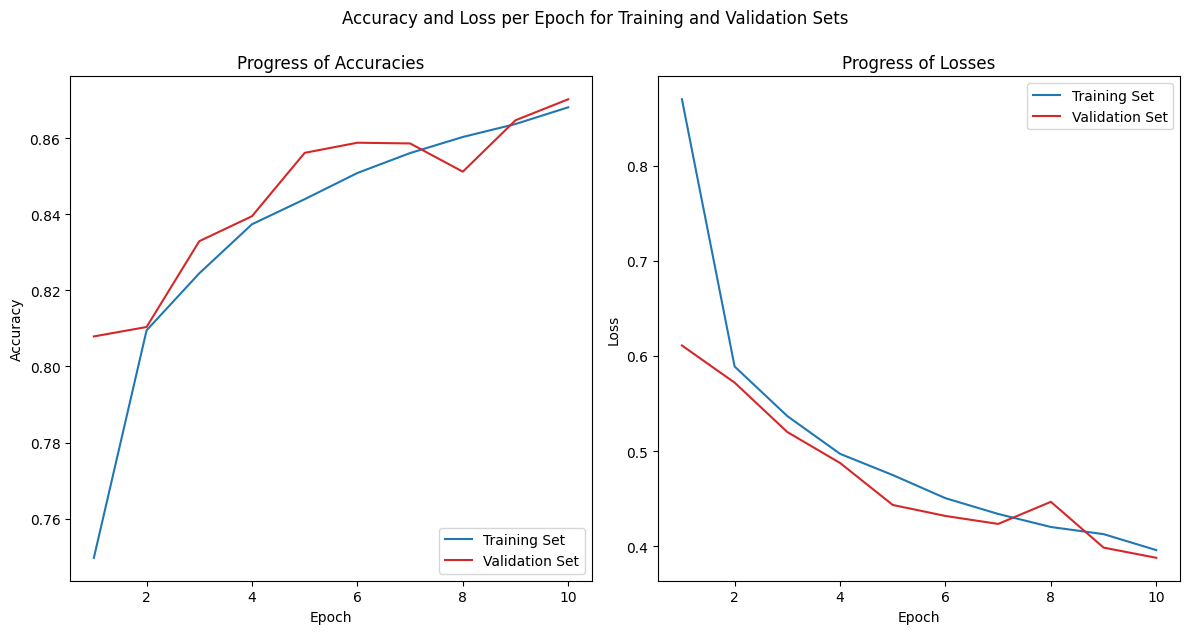

In [41]:
# Plot training progress for training and validation data
training_progress(epochs, rnn_history.history['accuracy'], rnn_history.history['loss'], rnn_history.history['val_accuracy'], rnn_history.history['val_loss'])

**Comments:** Accuracy and loss consistently improved across epochs for both the training and validation sets, with occasional fluctuations in validation progress closely following the training set. The highest accuracy achieved was around 87%, accompanied by a loss of approximately 0.39 for both training and validation. There were no signs of significant overfitting observed throughout the training process, likely attributable to L2-regularisation.

View performance metrics after predicting on the test set.

In [42]:
# Predict on test set
rnn_preds = rnn.predict(x_test)

# Extract confidence scores for predicted labels
confidence_scores = np.max(rnn_preds, axis = 1)

# Extract predicted labels
y_pred = np.argmax(rnn_preds, axis = 1)

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step


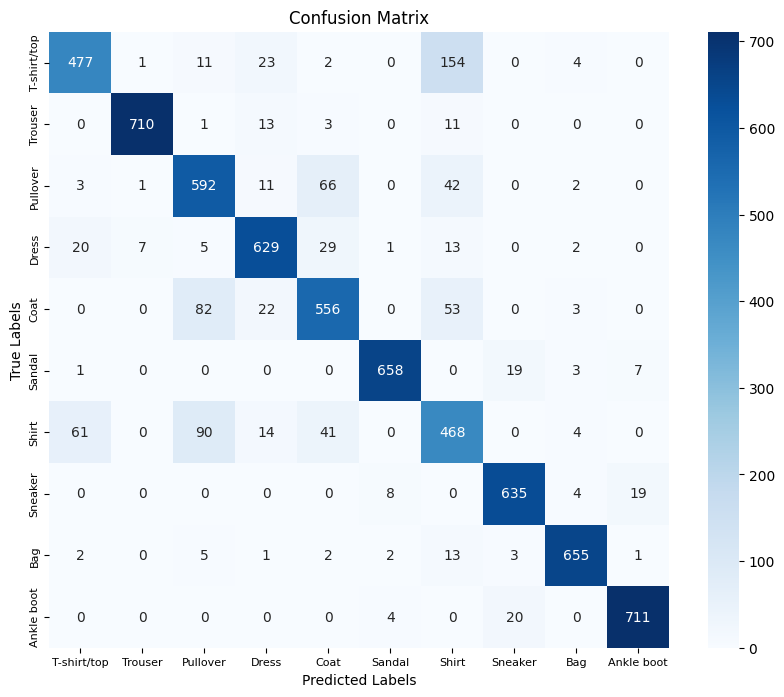

In [43]:
# Plot confusion matrix
confusion_matrix_ad(y_test, y_pred, num_classes, classes)

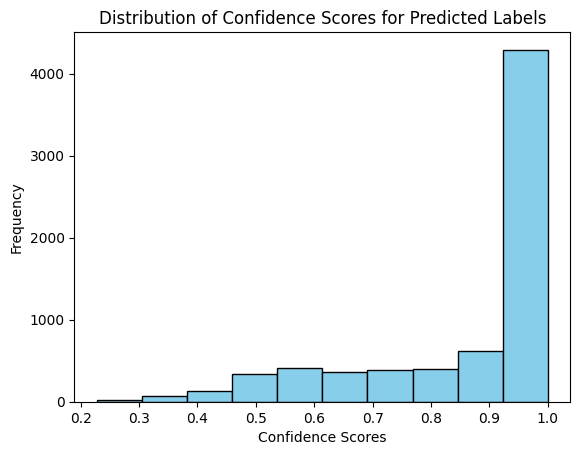

In [44]:
# Plot distribution of confidence scores
confidence_distribution(confidence_scores)

In [45]:
# Display classification report
classification_report_ad(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8457    0.7098    0.7718       672
           1     0.9875    0.9621    0.9746       738
           2     0.7532    0.8257    0.7878       717
           3     0.8822    0.8909    0.8865       706
           4     0.7954    0.7765    0.7859       716
           5     0.9777    0.9564    0.9669       688
           6     0.6207    0.6903    0.6536       678
           7     0.9380    0.9535    0.9456       666
           8     0.9675    0.9576    0.9625       684
           9     0.9634    0.9673    0.9654       735

    accuracy                         0.8701      7000
   macro avg     0.8731    0.8690    0.8701      7000
weighted avg     0.8739    0.8701    0.8711      7000



**Summary**: The model demonstrated generally strong predictions across all classes, though it frequently misclassified shirts as t-shirts/tops and pullovers, and coats as pullovers and shirts. Confidence scores were predominantly high, clustering between 50% to 80%. The accuracy and F1 score of 87% closely matched previous models. However, the shirt class showed low precision, recall, and F1 score values. Recurrent Neural Networks (RNNs) excel in processing sequential data by retaining information from past inputs. Therefore, it's unsurprising that the model did not outperform the baseline (Model 1), despite an extensive training time of 19 minutes and nearly 1.5 million model parameters.

##### **Model 6: Residual Network (ResNet)**

Build a residual neural network with 1 initial convolutional layer (alongside batch normalisation and pooling layers), 2 residual blocks, and a fully-connected hidden layer with L2-Regularisation.

In [55]:
# Define Residual Block
def residual_block(x, filters, kernel_size):

    # Add 2 convolutional layers with batch normalisation
    y = layers.Conv2D(filters, kernel_size, padding = 'same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation('relu')(y)
    
    y = layers.Conv2D(filters, kernel_size, padding = 'same')(y)
    y = layers.BatchNormalization()(y)
    
    # Apply identity mapping
    y = layers.add([x, y])
    y = layers.Activation('relu')(y)

    return y

# Define ResNet model
def ResNet(input_shape, num_classes):
    inputs = layers.Input(shape = input_shape)
    
    # Initial convolutional layer
    x = layers.Conv2D(64, (3, 3), padding = 'same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3))(x)
    
    # Add residual blocks
    x = residual_block(x, filters = 64, kernel_size = (3, 3))
    x = residual_block(x, filters = 64, kernel_size = (3, 3))
    
    # Apply global average pooling
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)

    # Add hidden layer
    x = layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.1))(x)
    
    # Output Layer
    outputs = layers.Dense(num_classes, activation = 'softmax')(x)
    
    model = models.Model(inputs, outputs)

    return model

# Create ResNet model
input_shape = x_train.shape[1:]
resnet = ResNet(input_shape, num_classes)

# Compile the model
resnet.compile(optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy',
                     metrics = ['accuracy'])

# Define a History callback to record training metrics
resnet_history = History()

# Fit model on training data
resnet.fit(x_train, y_train, batch_size = 32, epochs = 10, callbacks = [resnet_history],  validation_data = (x_val, y_val))

# Print model summary
resnet.summary()

Epoch 1/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 91s 53ms/step - accuracy: 0.7476 - loss: 2.0717 - val_accuracy: 0.7366 - val_loss: 0.8046
Epoch 2/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.8574 - loss: 0.4819 - val_accuracy: 0.8245 - val_loss: 0.5633
Epoch 3/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 89s 54ms/step - accuracy: 0.8785 - loss: 0.4014 - val_accuracy: 0.8637 - val_loss: 0.4290
Epoch 4/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 89s 54ms/step - accuracy: 0.8903 - loss: 0.3586 - val_accuracy: 0.8670 - val_loss: 0.4013
Epoch 5/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 90s 55ms/step - accuracy: 0.8979 - loss: 0.3331 - val_accuracy: 0.8872 - val_loss: 0.3619
Epoch 6/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 98s 60ms/step - accuracy: 0.9046 - loss: 0.3092 - val_accuracy: 0.8889 - val_loss: 0.3623
Epoch 7/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 101s 62ms/step - accuracy: 0.9069 - loss: 0.3008 - val_accuracy: 0.8828 - val_loss: 0.3473
Epoch 8/10
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 97s 59ms/step - accuracy: 0.9156 

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 28, 28,    │        640 │ input_layer_12[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_35       │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 9, 9, 64)  │          0 │ activation_35[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ max_pooling2d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 9, 9, 64)  │        256 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_36       │ (None, 9, 9, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ activation_36[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 9, 9, 64)  │        256 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 9, 9, 64)  │          0 │ max_pooling2d_9[… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_37       │ (None, 9, 9, 64)  │          0 │ add_14[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ activation_37[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 9, 9, 64)  │        256 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_38       │ (None, 9, 9, 64)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 9, 9, 64)  │     36,928 │ activation_38[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 9, 9, 64)  │        256 │ conv2d_42[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 9, 9, 64)  │          0 │ activation_37[0]… │
│                     │                   │            │ batch_normalizat

 Total params: 462,048 (1.76 MB)

 Trainable params: 153,802 (600.79 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 307,606 (1.17 MB)

Let's look at the training progress over all epochs.    

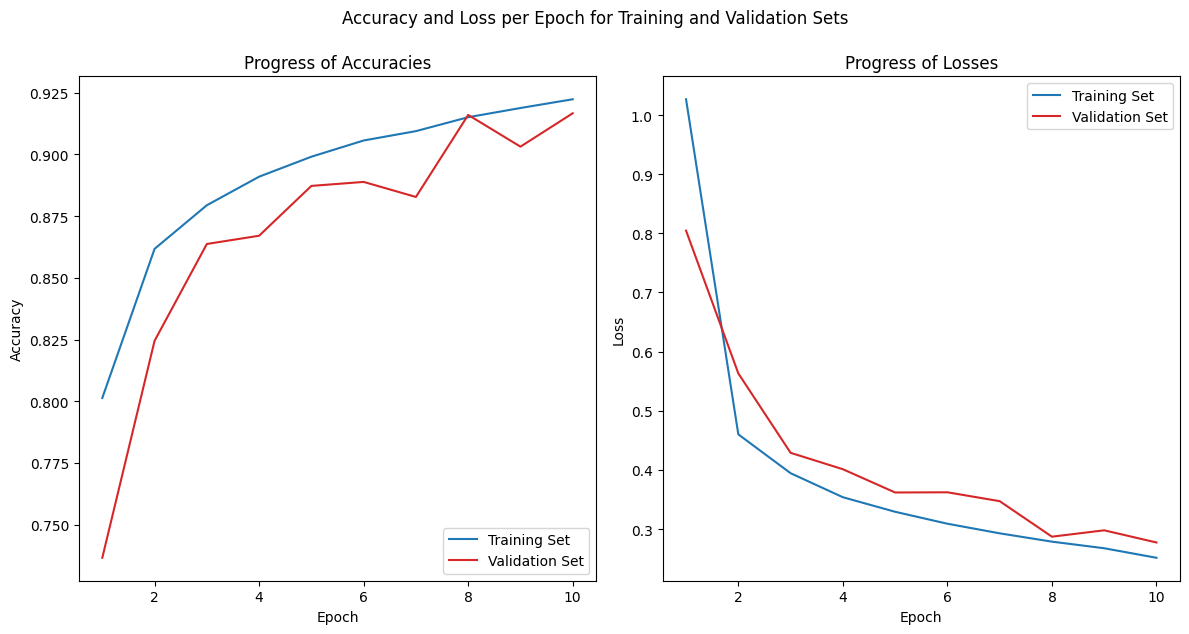

In [56]:
# Plot training progress for training and validation data
training_progress(epochs, resnet_history.history['accuracy'], resnet_history.history['loss'], resnet_history.history['val_accuracy'], resnet_history.history['val_loss'])

**Comments:** Training progress reveals that the model learned exceptionally well on the training set, achieving a peak accuracy of 92% with consistent improvements. Similarly, the validation set approached 92% accuracy by the final epoch, showing minor fluctuations and minimal signs of overfitting. Both training and validation curves closely paralleled each other throughout the training process.

View performance metrics after predicting on the test set.

In [57]:
# Predict on test set
resnet_preds = resnet.predict(x_test)

# Extract confidence scores for predicted labels
confidence_scores = np.max(resnet_preds, axis = 1)

# Extract predicted labels
y_pred = np.argmax(resnet_preds, axis = 1)

219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


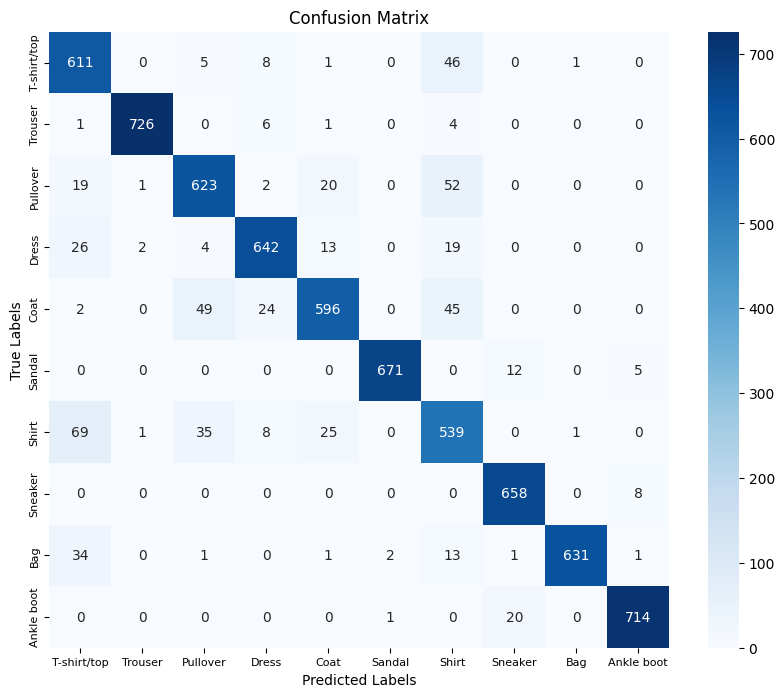

In [58]:
# Plot confusion matrix
confusion_matrix_ad(y_test, y_pred, num_classes, classes)

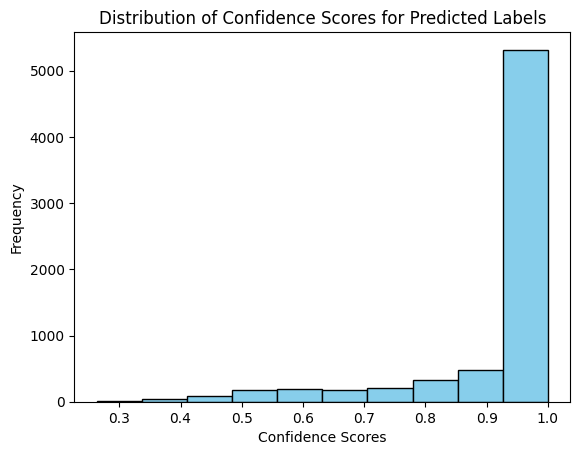

In [59]:
# Plot distribution of confidence scores
confidence_distribution(confidence_scores)

In [60]:
# Display classification report
classification_report_ad(y_test, y_pred)

              precision    recall  f1-score   support

           0     0.8018    0.9092    0.8522       672
           1     0.9945    0.9837    0.9891       738
           2     0.8689    0.8689    0.8689       717
           3     0.9304    0.9093    0.9198       706
           4     0.9072    0.8324    0.8682       716
           5     0.9955    0.9753    0.9853       688
           6     0.7507    0.7950    0.7722       678
           7     0.9522    0.9880    0.9698       666
           8     0.9968    0.9225    0.9582       684
           9     0.9808    0.9714    0.9761       735

    accuracy                         0.9159      7000
   macro avg     0.9179    0.9156    0.9160      7000
weighted avg     0.9190    0.9159    0.9167      7000



**Summary**: The confusion matrix revealed excellent results across all classes, with shirts being predicted relatively well despite historically being the weakest class in earlier models. Confidence scores were notably high, underscoring the model's predictive capability. The overall accuracy and F1 macro score on the test set reached an impressive 92%. Precision, recall, and F1-scores were generally high for all classes, with shirts performing the least effectively relative to the other classes.

#### Results

All models performed reasonably well, achieving accuracies above 83% on the test set. ResNet (Model 6) emerged as the top performer, closely followed by CNN (Model 4) and the baseline (Model 1). While the baseline trained quickly, concerns about overfitting on the training data suggest it may not generalize well to broader use cases.

CNN showcased its effectiveness in image classification tasks, leveraging localized feature extraction through convolutional layers. ResNet effectively tackled overfitting and demonstrated strong performance across all classes, particularly distinguishing between upper body garments like shirts, pullovers, coats, and t-shirts/tops.

The use of residual blocks in ResNet addressed the gradient vanishing problem, contributing to its pivotal role in deep learning advancements and the rise of pre-trained models and transfer learning strategies following the influential 2015 Microsoft paper ("Deep Residual Learning for Image Recognition").

To further enhance ResNet's performance, potential improvements include fine-tuning hyperparameters such as the L2-Regularisation penalty, initial learning rate and batch size, optimising configurations of convolutional layers, exploring adjustments in network depth and the number of residual blocks and adjusting the placement and type of skip connections. These refinements aim to consolidate ResNet's strengths and push the boundaries of its capabilities in various applications.

#### Ambiguous Images
Using the best model, find the 10 most ambiguous images in the test set based on predicted confidence scores.

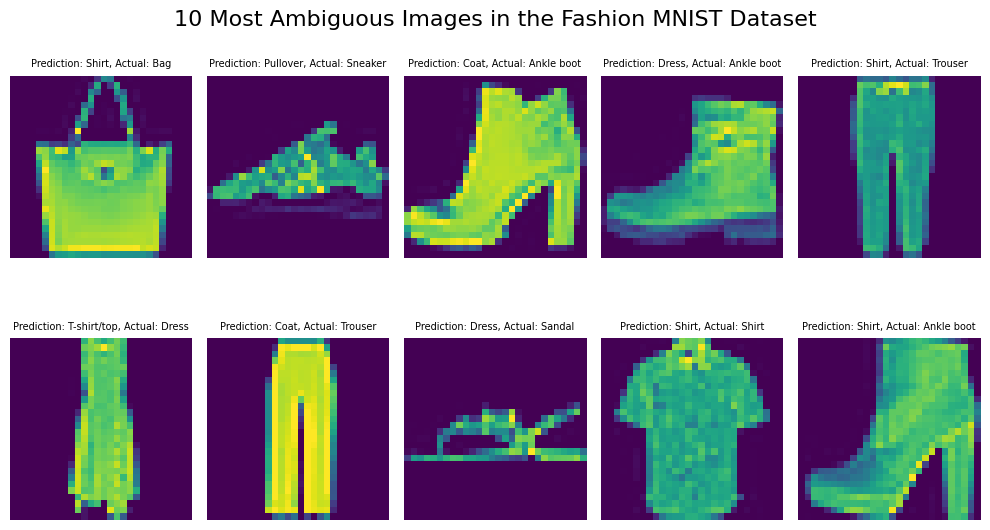

In [80]:
# Get the lowest confidence scores from predictions above for ResNet (Model 6)
indexes = sorted((value, index) for index, value in enumerate(confidence_scores))
smallest_indexes = indexes[:10]

# Display the associated images alongside the predicted and actual labels
plt.figure(figsize = (10, 6))
for i, lab in enumerate(smallest_indexes):
    plt.subplot(2, 5, i + 1)  
    plt.imshow(test_images[lab[1]])
    pred = classes[y_pred[lab[1]]]
    actual = classes[test_labels[lab[1]]]
    plt.title("Prediction: " + pred + ", Actual: " + actual, fontsize = 7)
    plt.axis('off')  
plt.tight_layout()
plt.suptitle("10 Most Ambiguous Images in the Fashion MNIST Dataset", fontsize = 16)
plt.show()